In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import arviz as az
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pystan
%load_ext jupyterstan

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
STAN_MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "stan_models")
STAN_DATA_PATH = os.path.join(PROJECT_ROOT_DIR,'data')

from stan_utils import *



In [2]:
%%stan prior_distribution
data {
}

generated quantities {
  real gama;
  real fai;
  real sigma;
  real sigma_eta;
  
  
  gama = uniform_rng(1, 10);
  fai = inv_gamma_rng(2, 10);
  sigma = normal_rng(0, 100);
  sigma_eta = normal_rng(0, 1);
    
}

INFO:pystan:COMPILING THE C++ CODE FOR MODEL prior_distribution_a9673925f7388c7a02cfc2713dfb5916 NOW.


Creating pystan model & assigning it to variable name "prior_distribution".
Stan options:
 {'model_name': 'prior_distribution', 'include_paths': None, 'boost_lib': None, 'eigen_lib': None, 'verbose': False, 'obfuscate_model_name': True}
StanModel now available as variable "prior_distribution"!
Compilation took a minute.


In [3]:
StanModel_cache(prior_distribution,'prior_distribution')

Model cached as:prior_distribution.pkl


In [4]:
prior_distribution = StanModel_load('prior_distribution')

Using cached StanModel:prior_distribution


In [5]:
data = {}
prior_gen = prior_distribution.sampling(data=data,
                                      iter=5000,
                                      chains=4, 
                                      algorithm="Fixed_param")  # 产生先验分布，iter ，chains与后验分布的相同

In [6]:
prior_data = az.from_pystan(posterior=prior_gen)

In [8]:
prior_data.to_netcdf('prior_data.nc')

'prior_data.nc'

In [10]:
%%stan prior_distribution2
data {
}

generated quantities {
  real gama;
  real fai;
  real sigma;
  real sigma_eta;
  
  
  gama = normal_rng(4, 4);
  fai = gamma_rng(1, 0.01);
  sigma = inv_gamma_rng(2, 10);
  sigma_eta = inv_gamma_rng(2, 10);
    
}

INFO:pystan:COMPILING THE C++ CODE FOR MODEL prior_distribution2_d2730187cb23d1dfcce033cd17278106 NOW.


Creating pystan model & assigning it to variable name "prior_distribution2".
Stan options:
 {'model_name': 'prior_distribution2', 'include_paths': None, 'boost_lib': None, 'eigen_lib': None, 'verbose': False, 'obfuscate_model_name': True}
StanModel now available as variable "prior_distribution2"!
Compilation took a minute.


In [11]:
data = {}
prior_gen2 = prior_distribution2.sampling(data=data,
                                      iter=5000,
                                      chains=4, 
                                      algorithm="Fixed_param")  # 产生先验分布，iter ，chains与后验分布的相同

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdda4b1dd90>,
      dtype=object)

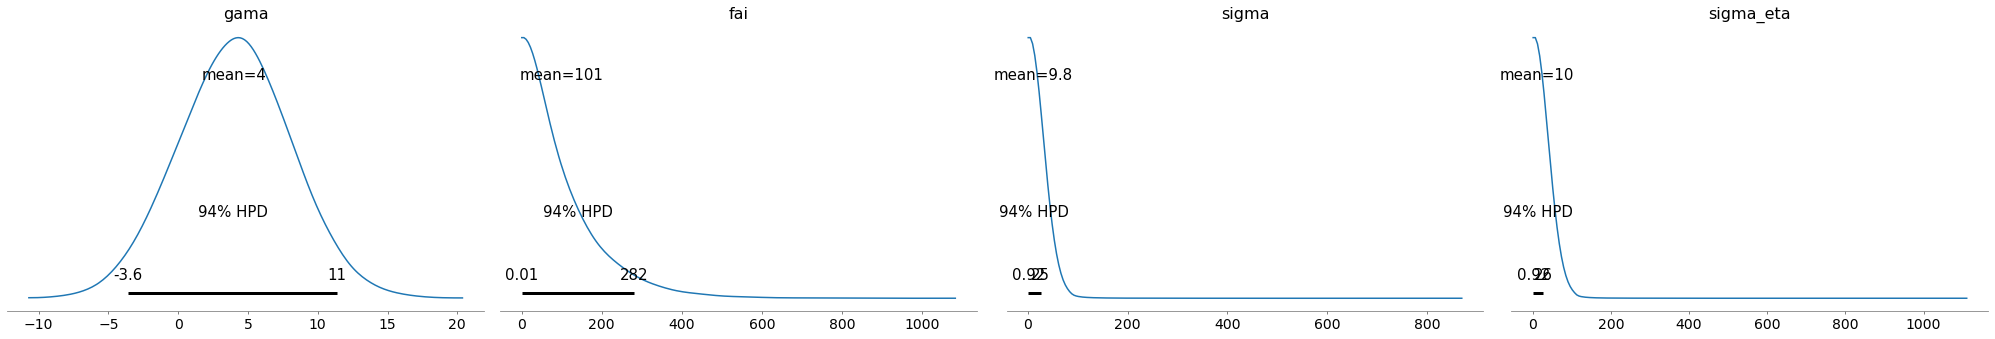

In [12]:
az.plot_posterior(prior_gen2)

In [13]:
prior_data2 = az.from_pystan(posterior=prior_gen2)

In [14]:
prior_data2.to_netcdf('prior_data2.nc')

'prior_data2.nc'